# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

In [1]:
import numpy as np
import tensorflow as tf

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

In [2]:
from tensorflow import keras

In [3]:
keras.layers.Dense(10, activation="sigmoid")

In [4]:
keras.Model()

In [5]:
keras.models.Sequential()

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

In [6]:
from keras.layers import Dense, Input, Flatten, Activation
from keras.models import Sequential
from keras import Model

In [7]:
Dense(10, activation="sigmoid")

In [8]:
Flatten(input_shape=[28, 28])

In [9]:
x_train = np.random.randn(5500, 2)

Input(shape=x_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

## 주요 레이어

### Dense
- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform' 가중치(Xavier 초기화), zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [10]:
dense = Dense(10, activation="relu", name="Dense Layer")

In [11]:
dense

In [12]:
dense2 = Dense(15, activation="softmax")

In [13]:
dense2

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

In [14]:
dense = Dense(10, kernel_initializer="he_normal", name="Dense Layer")
dense = Activation(dense)

dense

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

In [15]:
Flatten(input_shape=(28, 28))

### Input
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- summary() 메소드를 통해서는 보이지 않음

In [16]:
input_1 = Input(shape=(28, 28), dtype=tf.float32)
input_2 = Input(shape=(8,), dtype=tf.float32)

In [17]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [18]:
input_2

<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'input_3')>

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [19]:
from keras.utils import plot_model

In [20]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

모델 구조 확인
- model 객체의 **summary()** 이용

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


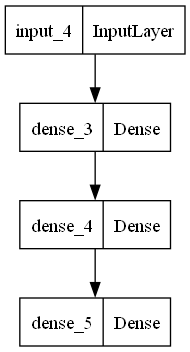

In [22]:
plot_model(model)

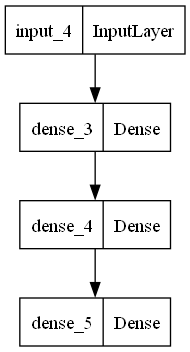

In [23]:
plot_model(model, to_file="model1.png")

In [24]:
model = Sequential([
    Input(shape=(28, 28), name="Input"),
    Dense(300, activation="relu", name="Dense1"),
    Dense(100, activation="relu", name="Dense2"),
    Dense(10, activation="softmax", name="output"),
])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


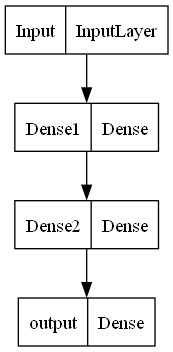

In [26]:
plot_model(model)

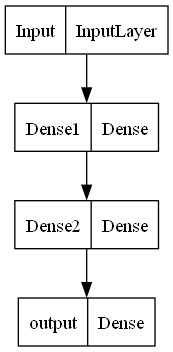

In [27]:
plot_model(model, to_file="model2.png")

### 함수형 API

- 가장 권장되는 방법

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [28]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.utils import plot_model

In [29]:
inputs = Input(shape=(28, 28, 1))

x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation="relu")(x)
x = Dense(100, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

In [30]:
model = Model(inputs=inputs, outputs=x)

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


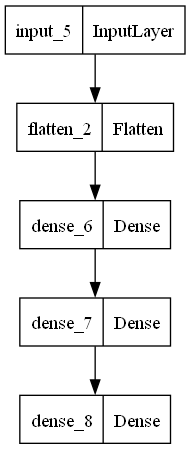

In [32]:
plot_model(model)

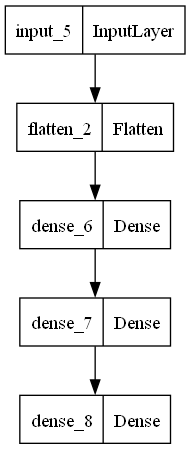

In [33]:
plot_model(model, to_file="model3.png")

In [34]:
from keras.layers import Concatenate

input_layer = Input(shape=(28, 28))
hidden1 = Dense(100, activation="relu")(input_layer)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=input_layer, outputs=output)

In [35]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 28, 100)              2900      ['input_6[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 28, 30)               3030      ['dense_9[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 28, 58)               0         ['input_6[0][0]',             
                                                                     'dense_10[0][0]']      

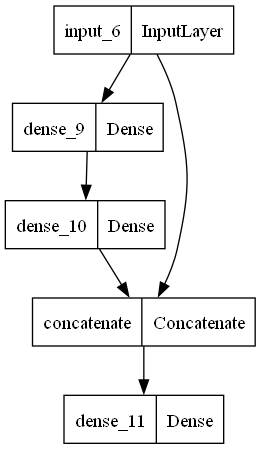

In [36]:
plot_model(model)

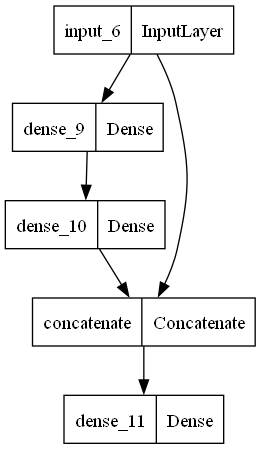

In [37]:
plot_model(model, to_file="model4.png")

In [38]:
input_1 = Input(shape=(10, 10), name="input_1")
input_2 = Input(shape=(10, 28), name="input_2")

hidden1 = Dense(100, activation="relu")(input_2)
hidden2 = Dense(10, activation="relu")(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation="sigmoid", name="output")(concat)

model = Model(inputs=[input_1, input_2], outputs=output)

In [39]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 28)]             0         []                            
                                                                                                  
 dense_12 (Dense)            (None, 10, 100)              2900      ['input_2[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_13 (Dense)            (None, 10, 10)               1010      ['dense_12[0][0]']            
                                                                                            

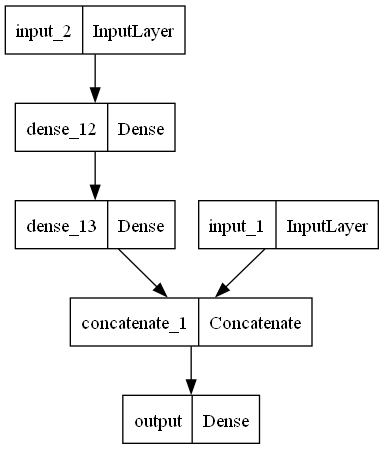

In [40]:
plot_model(model)

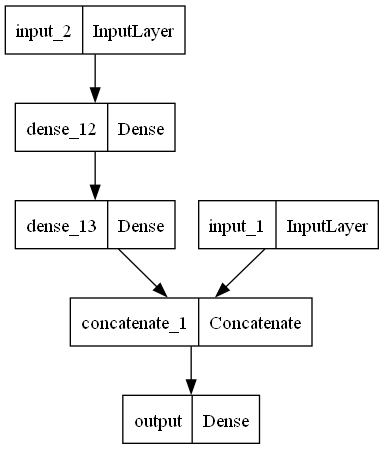

In [41]:
plot_model(model, to_file="model5.png")

In [42]:
input_ = Input(shape=(10, 10), name="input_")

hidden1 = Dense(100, activation="relu")(input_)
hidden2 = Dense(10, activation="relu")(hidden1)

output = Dense(1, activation="sigmoid", name="main_output")(hidden2)
sub_out = Dense(1, name="sub_output")(hidden2)

model = Model(inputs=input_, outputs=[output, sub_out])

In [43]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ (InputLayer)         [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 10, 100)              1100      ['input_[0][0]']              
                                                                                                  
 dense_15 (Dense)            (None, 10, 10)               1010      ['dense_14[0][0]']            
                                                                                                  
 main_output (Dense)         (None, 10, 1)                11        ['dense_15[0][0]']            
                                                                                            

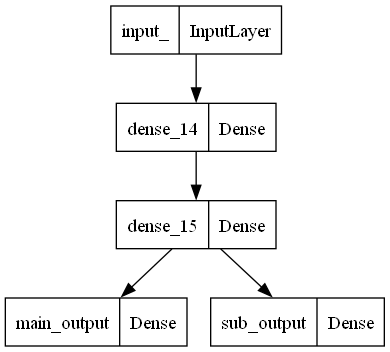

In [44]:
plot_model(model)

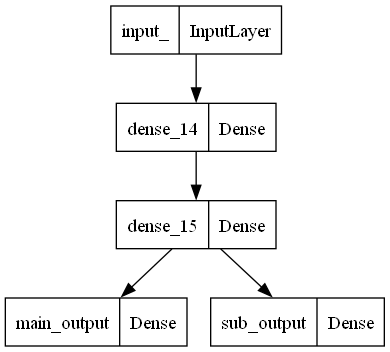

In [45]:
plot_model(model, to_file="model6.png")

In [46]:
input_1 = Input(shape=(10, 10), name="input_1")
input_2 = Input(shape=(10, 28), name="input_2")

hidden1 = Dense(100, activation="relu")(input_2)
hidden2 = Dense(10, activation="relu")(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation="sigmoid", name="main_output")(concat)
sub_out = Dense(1, name="sub_output")(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])

In [47]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 28)]             0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 10, 100)              2900      ['input_2[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 10, 10)               1010      ['dense_16[0][0]']            
                                                                                            

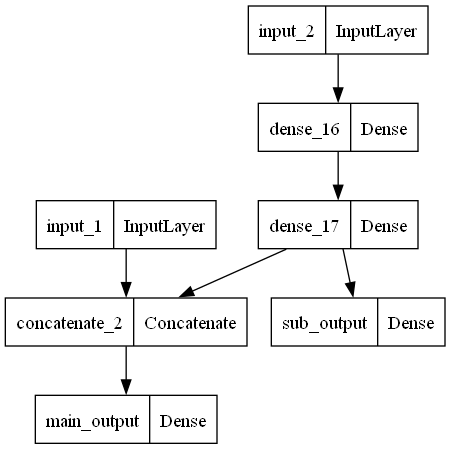

In [48]:
plot_model(model)

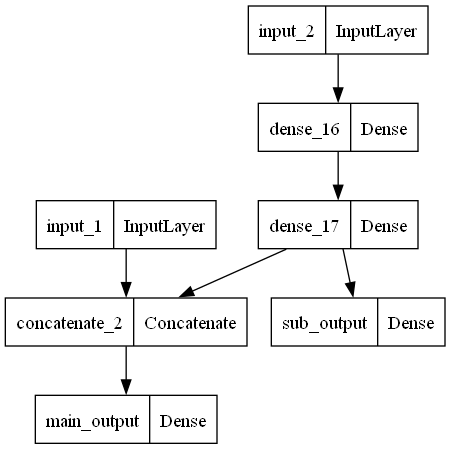

In [49]:
plot_model(model, to_file="model7.png")

### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

In [50]:
class MyModel(Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super(MyModel, self).__init__(**kwargs)

        self.dense_layer1 = Dense(300, activation=activation)
        self.dense_layer2 = Dense(100, activation=activation)
        self.dense_layer3 = Dense(units, activation=activation)

        self.output_layer = Dense(10, activation="softmax")

    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)

        return x

## 모델 가중치 확인

In [51]:
inputs = Input(shape=(28, 28, 1))

x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation="relu")(x)
x = Dense(100, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=x)

In [52]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델의 레이어들이 리스트로 표현됨


In [53]:
model.layers

In [54]:
hidden_2 = model.layers[2]

hidden_2.name

'dense_18'

위의 layer name 참고

In [55]:
model.get_layer("dense_18") is hidden_2

True

In [56]:
weights, biases = hidden_2.get_weights()

In [57]:
weights

array([[-0.02177765, -0.06186969,  0.07386082, ..., -0.06253044,
        -0.04587685,  0.06262556],
       [ 0.05396713, -0.06480435,  0.01286715, ...,  0.00078408,
         0.00598356,  0.00306104],
       [ 0.00284983, -0.07152566, -0.0310308 , ...,  0.06327902,
        -0.02413228,  0.04017695],
       ...,
       [ 0.02625882,  0.02771801, -0.05228371, ...,  0.00469068,
        -0.00439611,  0.0155948 ],
       [-0.00439716, -0.01444988, -0.0112795 , ...,  0.05952707,
        -0.01162596, -0.06780672],
       [ 0.05648929,  0.01394078,  0.01215588, ..., -0.04030083,
        -0.06173399, -0.06290265]], dtype=float32)

In [58]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [59]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


In [60]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제  
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])

- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy'])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy'])



## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import

In [61]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras import models
from keras.layers import Dense, Input, Flatten
from keras.utils import to_categorical
from keras.utils import plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### 데이터셋 로드
- MNIST 데이터셋을 로드

- Train Data 중, 30%를 검증 데이터(valiation data)로 사용


In [62]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path="mnist.npz")

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)

### 데이터 확인

In [63]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])

In [64]:
print(f"Train data: {x_train_full.shape}\tLabel: {y_train_full.shape}")
print(f"Train data: {x_train.shape}\tLabel: {y_train.shape}")
print(f"Validation data: {x_val.shape}\tLabel: {y_val.shape}")
print(f"Test data: {x_test.shape}\tLabel: {y_test.shape}")

Train data: (60000, 28, 28)	Label: (60000,)
Train data: (42000, 28, 28)	Label: (42000,)
Validation data: (18000, 28, 28)	Label: (18000,)
Test data: (10000, 28, 28)	Label: (10000,)


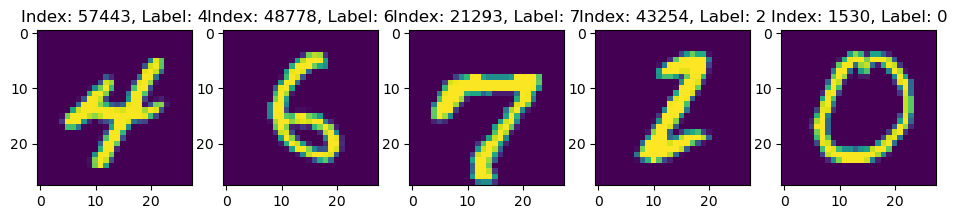

In [65]:
num_sample = 5
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(14, 8))
for i, idx in enumerate(random_idxs):
    img = x_train_full[idx, :, :]
    label = y_train_full[idx]

    plt.subplot(1, num_sample + 1, i + 1) 
    plt.imshow(img)
    plt.title(f"Index: {idx}, Label: {label}")

In [66]:
y_train[0]

8

### 데이터 전처리
- Normalization

In [67]:
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [68]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 모델 구성 (Sequential)

In [69]:
model = Sequential([
    Input(shape=[28, 28], name="input"),
    Flatten(input_shape=[28, 28], name="flatten"),
    Dense(100, activation="relu", name="dense1"),
    Dense(64, activation="relu", name="dense2"),
    Dense(32, activation="relu", name="dense3"),
    Dense(10, activation="softmax", name="output"),
])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


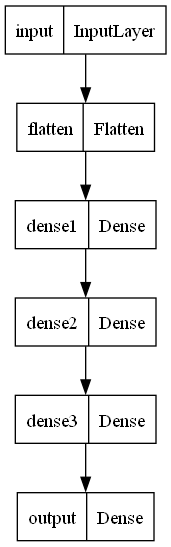

In [71]:
plot_model(model)

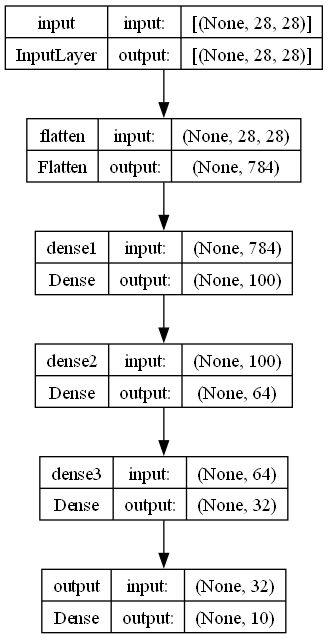

In [72]:
plot_model(model, show_shapes=True)

### 모델 컴파일

In [73]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.optimizers.SGD(),
    metrics=["accuracy"]
)

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [74]:
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/200
329/329 [==============================] - 1s 3ms/step - loss: 1.8871 - accuracy: 0.4367 - val_loss: 1.2475 - val_accuracy: 0.7391
Epoch 2/200
329/329 [==============================] - 1s 2ms/step - loss: 0.8132 - accuracy: 0.8055 - val_loss: 0.5808 - val_accuracy: 0.8424
Epoch 3/200
329/329 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.8681 - val_loss: 0.4269 - val_accuracy: 0.8769
Epoch 4/200
329/329 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8888 - val_loss: 0.3707 - val_accuracy: 0.8932
Epoch 5/200
329/329 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.9007 - val_loss: 0.3399 - val_accuracy: 0.8993
Epoch 6/200
329/329 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.9083 - val_loss: 0.3234 - val_accuracy: 0.9035
Epoch 7/200
329/329 [==============================] - 1s 2ms/step - loss: 0.3000 - accuracy: 0.9136 - val_loss: 0.3300 - val_accuracy: 0.9011

### 학습 결과 시각화

In [75]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

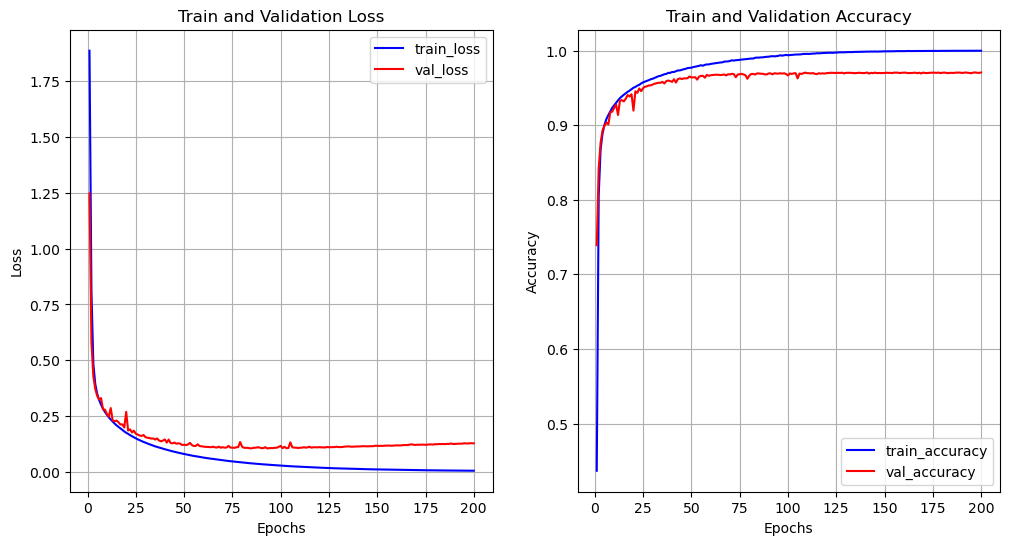

In [76]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color="blue", label="train_loss")
ax1.plot(epochs, val_loss, color="red", label="val_loss")
ax1.set_title("Train and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid()
ax1.legend()

accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color="blue", label="train_accuracy")
ax2.plot(epochs, val_accuracy, color="red", label="val_accuracy")
ax2.set_title("Train and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- evaluate

In [77]:
model.evaluate(x_test, y_test)

  1/313 [..............................] - ETA: 4s - loss: 0.0645 - accuracy: 0.9688

313/313 [==============================] - 0s 966us/step - loss: 0.1216 - accuracy: 0.9713


[0.12163258343935013, 0.9713000059127808]

### 학습된 모델을 통해 값 예측

In [78]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
print(pred_ys[0])

313/313 [==============================] - 0s 899us/step
(10000, 10)
[1.7069495e-09 7.7945712e-11 2.3945131e-06 2.5277945e-05 1.3772683e-10
 7.2056896e-12 5.7474126e-18 9.9997199e-01 2.9745961e-10 3.4550391e-07]


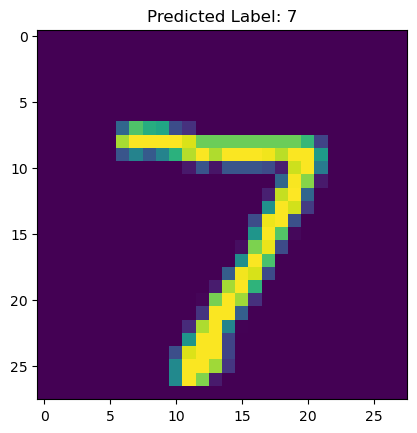

In [79]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0])
plt.title(f"Predicted Label: {arg_pred_y[0]}")
plt.show()

### 모델 평가 (2)
- 혼동행렬 (Confusion Maxtrix)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

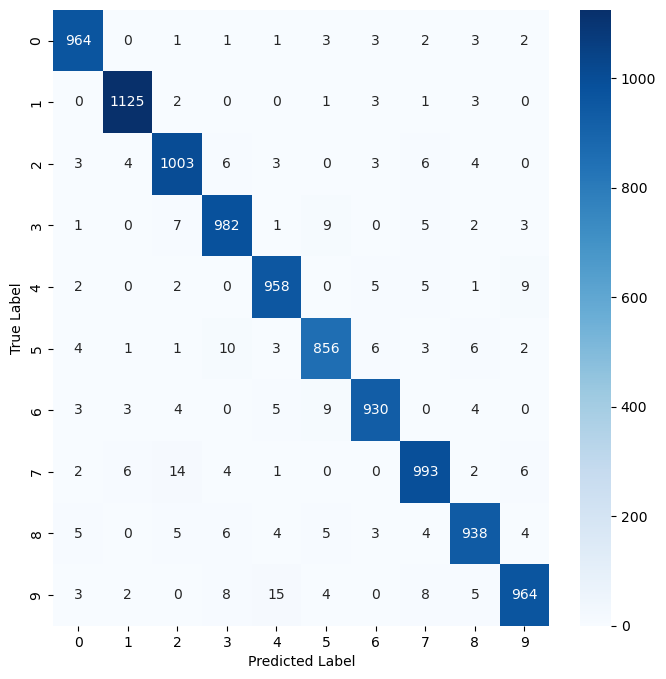

In [81]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

### 모델 평가 (3)
- 분류 보고서

In [82]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


In [83]:
model.save("mnist_model.keras", save_format="keras")

In [84]:
loaded_model = models.load_model("mnist_model.keras")

In [85]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)

np.set_printoptions(precision=7)
print(pred_ys2[0])

258/313 [=======================>......] - ETA: 0s

313/313 [==============================] - 0s 967us/step
(10000, 10)
[1.7069495e-09 7.7945712e-11 2.3945131e-06 2.5277945e-05 1.3772683e-10
 7.2056896e-12 5.7474126e-18 9.9997199e-01 2.9745961e-10 3.4550391e-07]


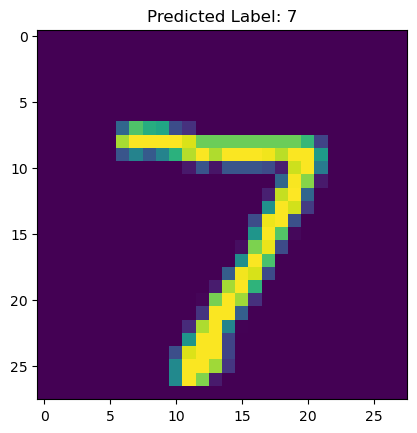

In [87]:
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

plt.imshow(x_test[0])
plt.title(f"Predicted Label: {arg_pred_y2[0]}")
plt.show()

## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


In [88]:
(x_train_full, y_train_full), (x_test, y_test) = load_data(path="mnist.npz")

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)

print(f"Train data: {x_train_full.shape}\tLabel: {y_train_full.shape}")
print(f"Train data: {x_train.shape}\tLabel: {y_train.shape}")
print(f"Validation data: {x_val.shape}\tLabel: {y_val.shape}")
print(f"Test data: {x_test.shape}\tLabel: {y_test.shape}")

x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

def build_model():
    model = Sequential([
        Input(shape=[28, 28], name="input"),
        Flatten(input_shape=[28, 28], name="flatten"),
        Dense(100, activation="relu", name="dense1"),
        Dense(64, activation="relu", name="dense2"),
        Dense(32, activation="relu", name="dense3"),
        Dense(10, activation="softmax", name="output"),
    ])

    model.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.SGD(), metrics=["accuracy"])

    return model

model = build_model()

model.summary()

Train data: (60000, 28, 28)	Label: (60000,)
Train data: (42000, 28, 28)	Label: (42000,)
Validation data: (18000, 28, 28)	Label: (18000,)
Test data: (10000, 28, 28)	Label: (10000,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total 

In [89]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

### ModelCheckpoint

In [90]:
check_point_cb = ModelCheckpoint("keras_mnist_model.keras")
history = model.fit(x_train, y_train, epochs=50, callbacks=[check_point_cb])

Epoch 1/50


1313/1313 [==============================] - 2s 1ms/step - loss: 0.8731 - accuracy: 0.7570
Epoch 2/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3229 - accuracy: 0.9080
Epoch 3/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9254
Epoch 4/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2156 - accuracy: 0.9375
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1872 - accuracy: 0.9464
Epoch 6/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1667 - accuracy: 0.9519
Epoch 7/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1497 - accuracy: 0.9578
Epoch 8/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1360 - accuracy: 0.9611
Epoch 9/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1242 - accuracy: 0.9636
Epoch 10/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1145 - accurac

In [91]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [92]:
loaded_model = load_model("keras_mnist_model.keras")

loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


최상의 모델만을 저장
- save_best_only=True

In [93]:
model = build_model()

cp = ModelCheckpoint("keras_best_mnist_model.h5", save_best_only=True)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[cp])

Epoch 1/50


1313/1313 [==============================] - 3s 2ms/step - loss: 0.7889 - accuracy: 0.7793 - val_loss: 0.3607 - val_accuracy: 0.8941
Epoch 2/50
 130/1313 [=>............................] - ETA: 1s - loss: 0.3665 - accuracy: 0.8933

c:\Users\kksoo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 2s 2ms/step - loss: 0.3138 - accuracy: 0.9092 - val_loss: 0.2841 - val_accuracy: 0.9155
Epoch 3/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2510 - accuracy: 0.9271 - val_loss: 0.2341 - val_accuracy: 0.9307
Epoch 4/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2108 - accuracy: 0.9399 - val_loss: 0.2131 - val_accuracy: 0.9368
Epoch 5/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1822 - accuracy: 0.9478 - val_loss: 0.1854 - val_accuracy: 0.9451
Epoch 6/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1605 - accuracy: 0.9535 - val_loss: 0.1720 - val_accuracy: 0.9498
Epoch 7/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1435 - accuracy: 0.9584 - val_loss: 0.1544 - val_accuracy: 0.9555
Epoch 8/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1296 - accuracy: 0.9620 - val_loss: 0.1414 - val_accuracy: 0.9579
Epo

In [94]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [95]:
# loaded_model_2 = load_model("keras_best_mnist_model.h5")

# loaded_model_2.summary()

### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

In [96]:
model = build_model()

cp = ModelCheckpoint("keras_best_mnist_model_2.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, monitor="val_loss", restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[cp, early_stopping_cb])

Epoch 1/100


1313/1313 [==============================] - 3s 2ms/step - loss: 0.8236 - accuracy: 0.7604 - val_loss: 0.3885 - val_accuracy: 0.8835
Epoch 2/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3290 - accuracy: 0.9038 - val_loss: 0.3025 - val_accuracy: 0.9097
Epoch 3/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2579 - accuracy: 0.9249 - val_loss: 0.2396 - val_accuracy: 0.9286
Epoch 4/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2163 - accuracy: 0.9367 - val_loss: 0.2149 - val_accuracy: 0.9364
Epoch 5/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1874 - accuracy: 0.9449 - val_loss: 0.1913 - val_accuracy: 0.9437
Epoch 6/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1656 - accuracy: 0.9516 - val_loss: 0.1776 - val_accuracy: 0.9469
Epoch 7/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1478 - accuracy: 0.9566 - val_loss: 0.1690 - val_accuracy: 0.94

### LearningRateScheduler

In [97]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [98]:
model = build_model()

round(model.optimizer.lr.numpy(), 5)

0.01

In [99]:
lr_scheduler_cb = LearningRateScheduler(schedule=scheduler)

history = model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val), callbacks=[lr_scheduler_cb])
round(model.optimizer.lr.numpy(), 5)

Epoch 1/15


1313/1313 [==============================] - 3s 2ms/step - loss: 0.8552 - accuracy: 0.7600 - val_loss: 0.3803 - val_accuracy: 0.8862 - lr: 0.0100
Epoch 2/15
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3271 - accuracy: 0.9048 - val_loss: 0.2894 - val_accuracy: 0.9129 - lr: 0.0100
Epoch 3/15
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.9240 - val_loss: 0.2404 - val_accuracy: 0.9290 - lr: 0.0100
Epoch 4/15
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2200 - accuracy: 0.9364 - val_loss: 0.2168 - val_accuracy: 0.9361 - lr: 0.0100
Epoch 5/15
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1912 - accuracy: 0.9448 - val_loss: 0.1943 - val_accuracy: 0.9428 - lr: 0.0100
Epoch 6/15
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1691 - accuracy: 0.9510 - val_loss: 0.1846 - val_accuracy: 0.9463 - lr: 0.0100
Epoch 7/15
1313/1313 [==============================] - 2s 2ms/step -

0.00607

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

In [100]:
TensorBoard(log_dir=".logs", histogram_freq=0, write_graph=True, write_images=True)

In [101]:
log_dir = "./logs"

tensor_board_cb = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

model = build_model()

model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=30, callbacks=[tensor_board_cb])

Epoch 1/30


1313/1313 [==============================] - 3s 2ms/step - loss: 0.8266 - accuracy: 0.7635 - val_loss: 0.3639 - val_accuracy: 0.8940
Epoch 2/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3195 - accuracy: 0.9072 - val_loss: 0.2935 - val_accuracy: 0.9126
Epoch 3/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2582 - accuracy: 0.9250 - val_loss: 0.2381 - val_accuracy: 0.9304
Epoch 4/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2200 - accuracy: 0.9361 - val_loss: 0.2187 - val_accuracy: 0.9353
Epoch 5/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1916 - accuracy: 0.9432 - val_loss: 0.2030 - val_accuracy: 0.9396
Epoch 6/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1702 - accuracy: 0.9497 - val_loss: 0.1805 - val_accuracy: 0.9459
Epoch 7/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1522 - accuracy: 0.9555 - val_loss: 0.1700 - val_accuracy: 0.9486
Epo

In [108]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000

In [111]:
%tensorboard --logdir={log_dir} --port 8000

Reusing TensorBoard on port 8000 (pid 7424), started 0:02:31 ago. (Use '!kill 7424' to kill it.)